In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc

print("Loading models and test data...")

# Load data (and reshape)
X_test = np.load('X_test_ultra.npy')
y_test = np.load('y_test_ultra.npy')
X_test = np.expand_dims(X_test, axis=-1)

# Load both saved models
model_baseline = tf.keras.models.load_model('baseline_model.keras')
model_improved = tf.keras.models.load_model('improved_model.keras')

print("Ready. Both models and test data are loaded.")

Loading models and test data...
Ready. Both models and test data are loaded.


In [14]:
# Get predictions (as 0 or 1)
y_pred_baseline = (model_baseline.predict(X_test) > 0.5).astype("int32")
y_pred_improved = (model_improved.predict(X_test) > 0.5).astype("int32")

print("--- BASELINE MODEL REPORT (DeepSignal-like) ---")
print(classification_report(y_test, y_pred_baseline, target_names=['Class 0 (No Spike)', 'Class 1 (Spike)']))

print("\n--- IMPROVED MODEL REPORT (1D-ResNet) ---")
print(classification_report(y_test, y_pred_improved, target_names=['Class 0 (No Spike)', 'Class 1 (Spike)']))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
--- BASELINE MODEL REPORT (DeepSignal-like) ---
                    precision    recall  f1-score   support

Class 0 (No Spike)       0.90      0.91      0.91      1002
   Class 1 (Spike)       0.91      0.90      0.91       998

          accuracy                           0.91      2000
         macro avg       0.91      0.91      0.91      2000
      weighted avg       0.91      0.91      0.91      2000


--- IMPROVED MODEL REPORT (1D-ResNet) ---
                    precision    recall  f1-score   support

Class 0 (No Spike)       0.99      0.98      0.99      1002
   Class 1 (Spike)       0.98      0.99      0.99       998

          accuracy                           0.99      2000
         macro avg       0.99      0.99      0.99      2000
      weighted avg       0.99      0.99      0.99      2000



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


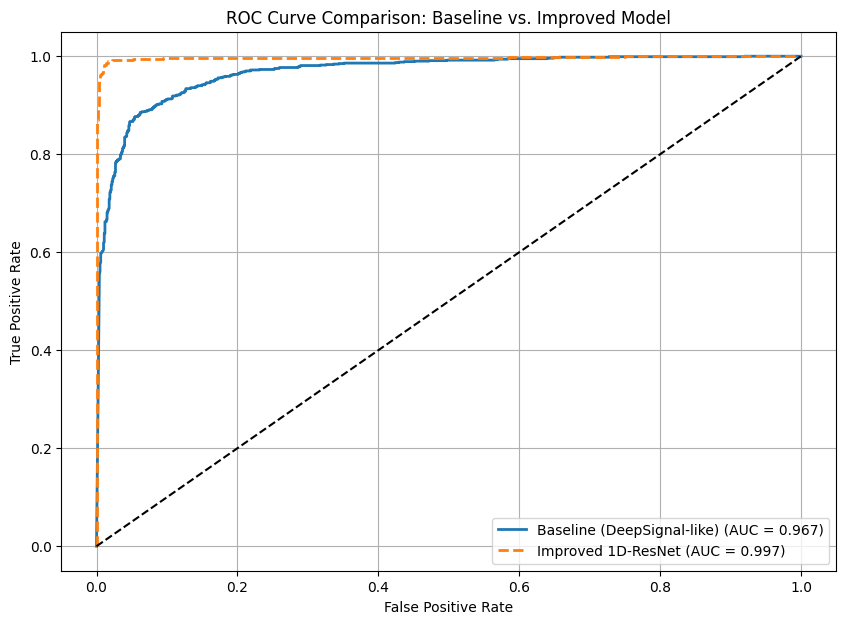

In [15]:
# Get prediction probabilities (the raw output, not 0 or 1)
y_prob_baseline = model_baseline.predict(X_test)
y_prob_improved = model_improved.predict(X_test)

# Calculate ROC curve points for baseline model
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_baseline)
auc_base = auc(fpr_base, tpr_base)

# Calculate ROC curve points for improved model
fpr_imp, tpr_imp, _ = roc_curve(y_test, y_prob_improved)
auc_imp = auc(fpr_imp, tpr_imp)

# Plot both curves on the same graph
plt.figure(figsize=(10, 7))
plt.plot(fpr_base, tpr_base, label=f'Baseline (DeepSignal-like) (AUC = {auc_base:.3f})', linewidth=2)
plt.plot(fpr_imp, tpr_imp, label=f'Improved 1D-ResNet (AUC = {auc_imp:.3f})', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--') # The 50/50 "random guess" line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Baseline vs. Improved Model')
plt.legend()
plt.grid(True)

# --- This saves the plot as a file in your folder ---
plt.savefig('ROC_Curve_Comparison.png')

plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


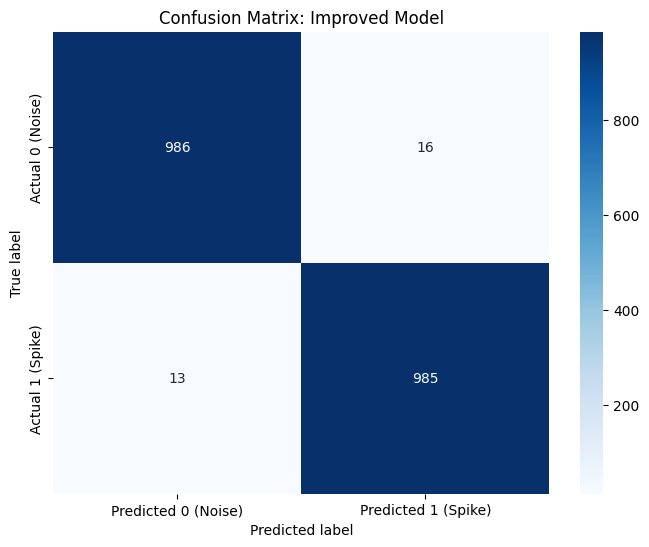

Confusion Matrix plot generated.


In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predictions for the Improved Model
y_pred_improved_binary = (model_improved.predict(X_test) > 0.5).astype("int32")

# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_improved_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Predicted 0 (Noise)', 'Predicted 1 (Spike)'], 
            yticklabels=['Actual 0 (Noise)', 'Actual 1 (Spike)'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix: Improved Model')
plt.savefig('Confusion_Matrix_Improved.png')
plt.show()

print("Confusion Matrix plot generated.")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


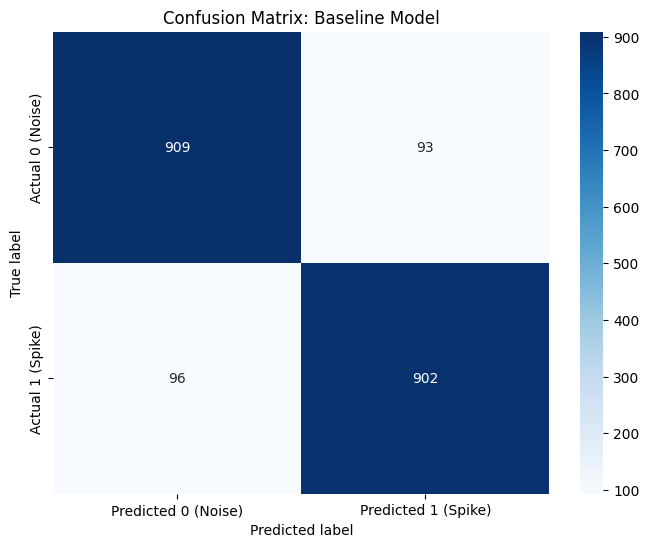

Confusion Matrix plot generated.


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predictions for the Improved Model
y_pred_improved_binary = (model_baseline.predict(X_test) > 0.5).astype("int32")

# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_improved_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Predicted 0 (Noise)', 'Predicted 1 (Spike)'], 
            yticklabels=['Actual 0 (Noise)', 'Actual 1 (Spike)'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix: Baseline Model')
plt.savefig('Confusion_Matrix_Baseline.png')
plt.show()

print("Confusion Matrix plot generated.")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


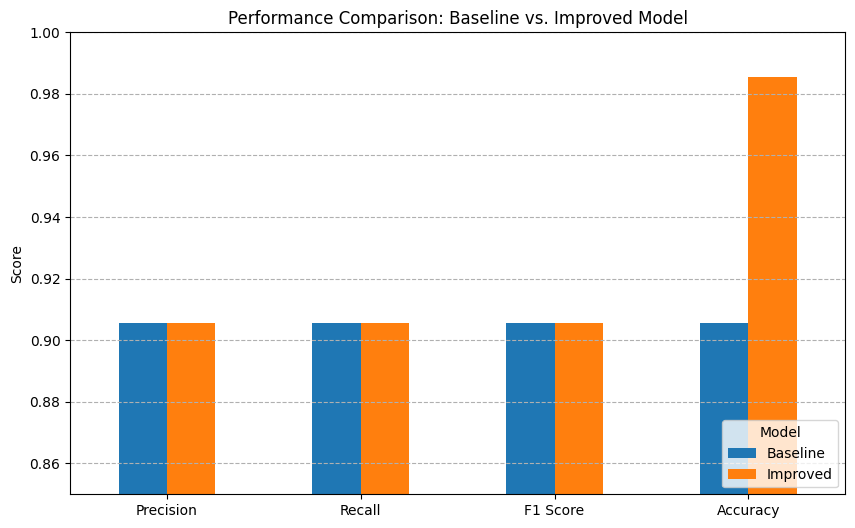

Metric Comparison Bar Chart generated.


In [18]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

# Calculate metrics for both models (assuming y_pred_baseline and y_pred_improved_binary are available from earlier cells)
y_pred_baseline_binary = (model_baseline.predict(X_test) > 0.5).astype("int32")

# Get detailed scores
precision_base, recall_base, f1_base, _ = precision_recall_fscore_support(y_test, y_pred_baseline_binary, average='weighted')
precision_imp, recall_imp, f1_imp, _ = precision_recall_fscore_support(y_test, y_pred_improved_binary, average='weighted')

# Create a DataFrame for plotting
metrics = {
    'Model': ['Baseline', 'Improved'],
    'Accuracy': [model_baseline.evaluate(X_test, y_test, verbose=0)[1], model_improved.evaluate(X_test, y_test, verbose=0)[1]],
    'Precision': [precision_base, precision_imp],
    'Recall': [recall_base, recall_imp],
    'F1 Score': [f1_base, f1_imp]
}
df = pd.DataFrame(metrics).set_index('Model')

# Plot the comparison
fig, ax = plt.subplots(figsize=(10, 6))
df[['Precision', 'Recall', 'F1 Score', 'Accuracy']].T.plot(kind='bar', ax=ax, rot=0)
plt.title('Performance Comparison: Baseline vs. Improved Model')
plt.ylabel('Score')
plt.ylim(0.85, 1.0) # Set a lower limit to emphasize differences
plt.legend(title='Model', loc='lower right')
plt.grid(axis='y', linestyle='--')
plt.savefig('Metric_Comparison_Bar_Chart.png')
plt.show()

print("Metric Comparison Bar Chart generated.")